# LSTM RNN time series prediction: univariate sine wave example

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
X_train = np.arange(0,100,0.5) 
y_train = np.sin(X_train)

X_test = np.arange(100,200,0.5) 
y_test = np.sin(X_test)

n_features = 1

train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))

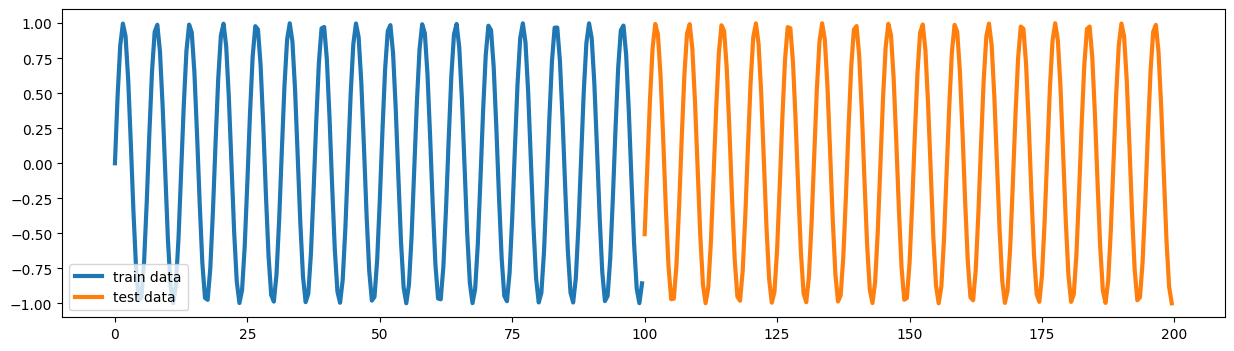

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=3, label='train data')
ax.plot(X_test, y_test,  lw=3, label='test data')
ax.legend(loc="lower left")
plt.show();

In [42]:
from keras.preprocessing.sequence import TimeseriesGenerator

look_back = 2

train_generator = TimeseriesGenerator(train_series, train_series,
                                      length=look_back,
                                      sampling_rate=1,
                                      stride=1,
                                      batch_size=1)

test_generator = TimeseriesGenerator(test_series, test_series,
                                     length=look_back,
                                     sampling_rate=1,
                                     stride=1,
                                     batch_size=1)


In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

n_neurons  = 4
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(train_generator, epochs=20, verbose=1)

Epoch 1/20
198/198 [==============================] - 3s 4ms/step - loss: 0.2971
Epoch 2/20
198/198 [==============================] - 1s 3ms/step - loss: 0.2357
Epoch 3/20
198/198 [==============================] - 1s 3ms/step - loss: 0.2081
Epoch 4/20
198/198 [==============================] - 1s 3ms/step - loss: 0.1892
Epoch 5/20
198/198 [==============================] - 1s 3ms/step - loss: 0.1677
Epoch 6/20
198/198 [==============================] - 1s 3ms/step - loss: 0.1384
Epoch 7/20
198/198 [==============================] - 1s 3ms/step - loss: 0.0980
Epoch 8/20
198/198 [==============================] - 1s 3ms/step - loss: 0.0553
Epoch 9/20
198/198 [==============================] - 1s 3ms/step - loss: 0.0246
Epoch 10/20
198/198 [==============================] - 1s 3ms/step - loss: 0.0106
Epoch 11/20
198/198 [==============================] - 1s 3ms/step - loss: 0.0061
Epoch 12/20
198/198 [==============================] - 1s 3ms/step - loss: 0.0048
Epoch 13/20
198/198 [====

### Prediction

In [44]:
test_predictions  = model.predict(test_generator)

198/198 [==============================] - 1s 2ms/step


ValueError: x and y must have same first dimension, but have shapes (180,) and (198, 1)

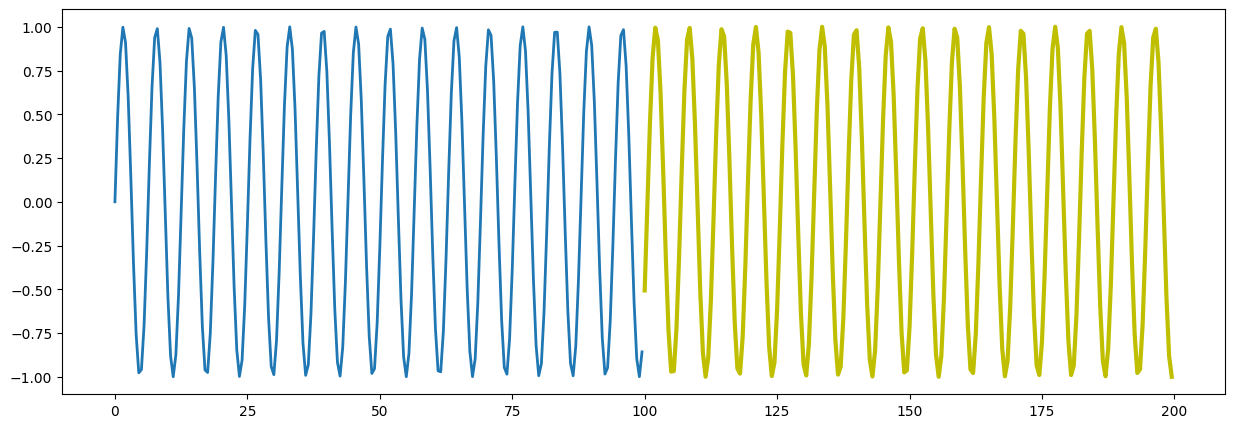

In [45]:
x = np.arange(110,200,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show();

### Extrapolation

In [ ]:
extrapolation = list()
seed_batch    = y_test[:look_back].reshape((1,look_back, n_features))
current_batch = seed_batch

# extrapolate the next 180 values
for i in range(180):
    predicted_value = model.predict(current_batch)[0]
    extrapolation.append(predicted_value) 
    current_batch = np.append(current_batch[:,1:,:],[[predicted_value]],axis=1)

1/1 [==============================] - 0s 24ms/step


KeyboardInterrupt: 

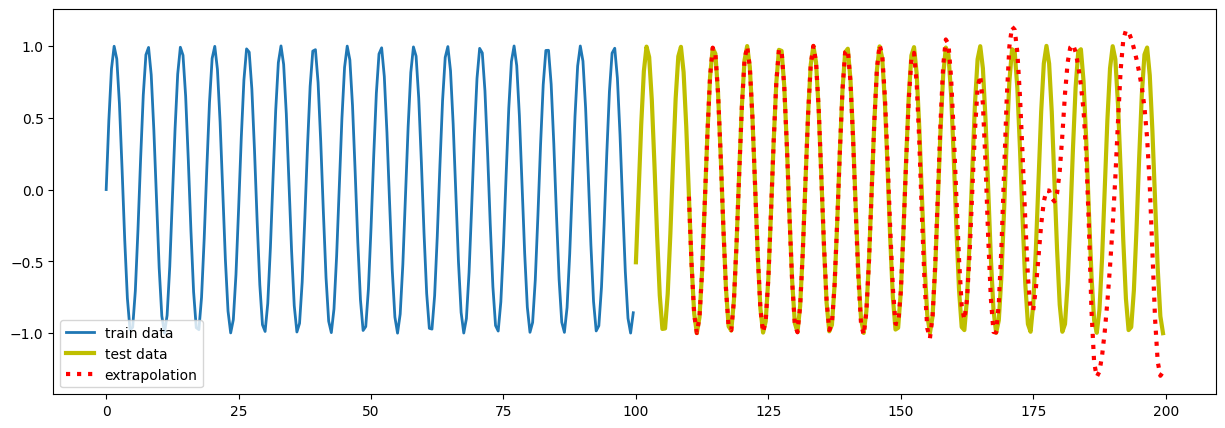

In [ ]:
x = np.arange(110,200,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,extrapolation, lw=3, c='r',linestyle = ':', label='extrapolation')
ax.legend(loc="lower left")
plt.show();

## Sine wave + 3rd harmonic + 5th harmonic
Let us complicate things a little by now adding the third and fifth harmonics to the input data

In [ ]:
X_train = np.arange(0,50,0.5) 
y_train = np.sin(X_train) + np.sin(3*X_train)/3 + np.sin(5*X_train)/5

X_test  = np.arange(50,100,0.5) 
y_test  = np.sin(X_train) + np.sin(3*X_train)/3 + np.sin(5*X_train)/5

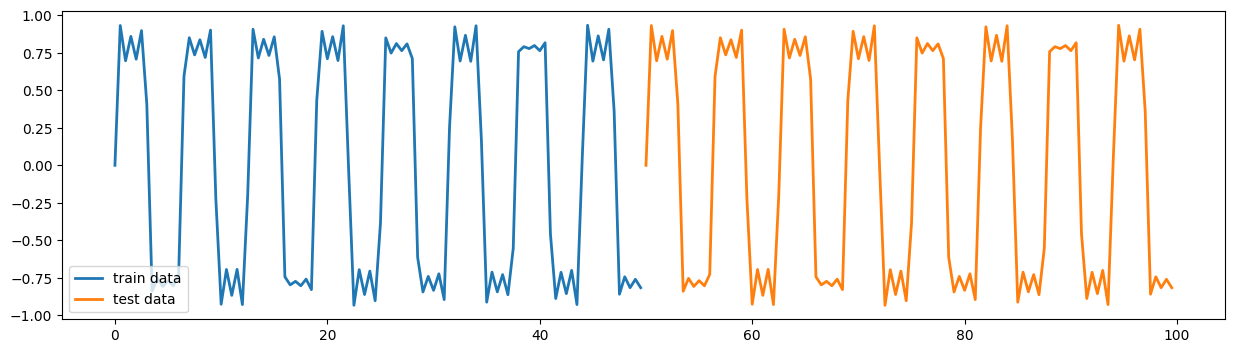

In [ ]:
train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test, y_test,  lw=2, label='test data')
ax.legend(loc="lower left")
plt.show();

In [ ]:
train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

model.fit(train_generator,epochs=300, verbose=0)

### Prediction

8/8 [==============================] - 0s 3ms/step


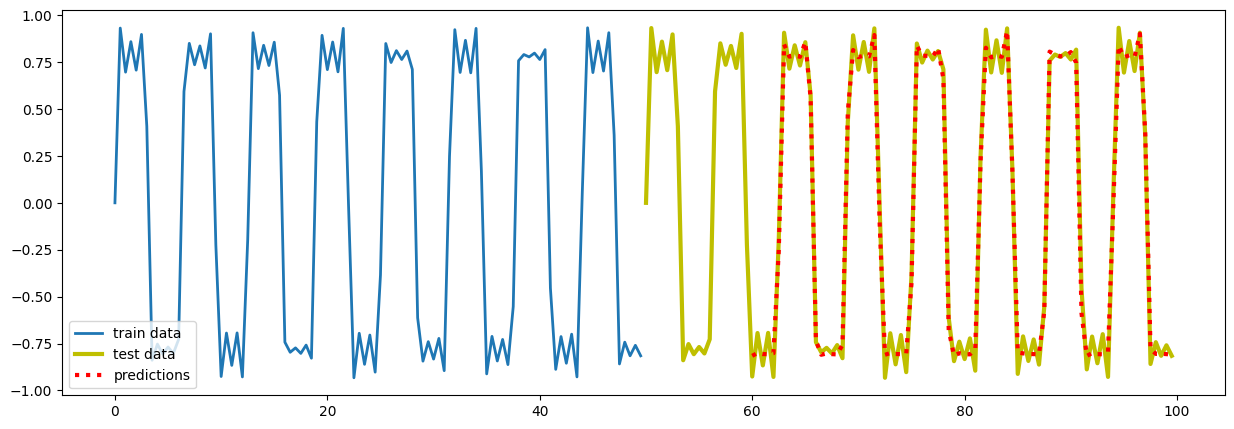

In [ ]:
test_predictions  = model.predict(test_generator)
x = np.arange(60,100,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show();

### Extrapolation

1/1 [==============================] - 0s 32ms/step


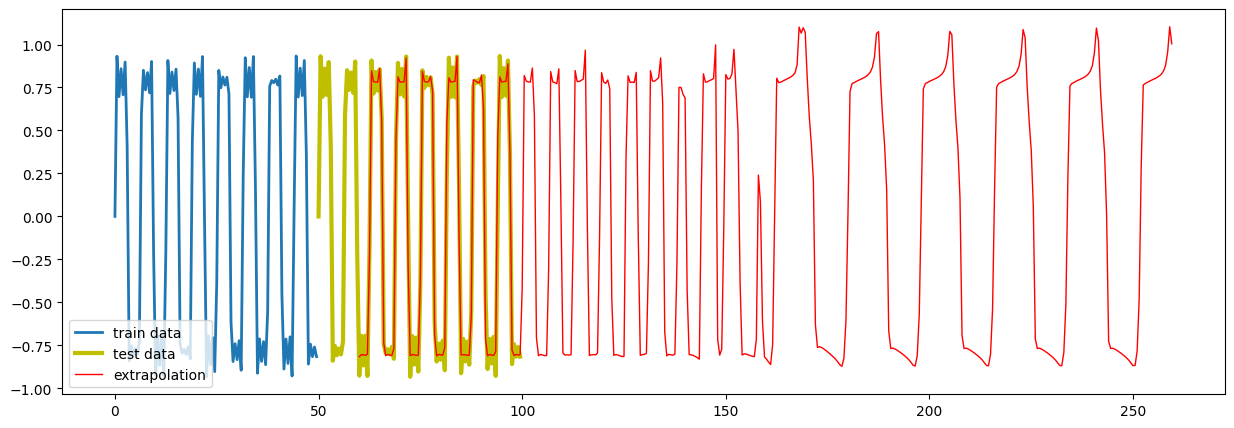

In [ ]:
extrapolation = list()
seed_batch    = y_test[:look_back].reshape((1,look_back, n_features))
current_batch = seed_batch

# extrapolate the next 180 values
for i in range(400):
    predicted_value = model.predict(current_batch)[0]
    extrapolation.append(predicted_value) 
    current_batch = np.append(current_batch[:,1:,:],[[predicted_value]],axis=1)

# plot
x = np.arange(60,260,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,extrapolation, lw=1, c='r', label='extrapolation')
ax.legend(loc="lower left")
plt.show();

## Related reading
* [Sepp Hochreiter and Jürgen Schmidhuber "Long Short-Term Memory", Neural Computation **9** pp. 1735-1780 (1997)](https://www.mitpressjournals.org/doi/pdf/10.1162/neco.1997.9.8.1735)
* [Long short-term memory](https://en.wikipedia.org/wiki/Long_short-term_memory) Wikipedia
* [keras LSTM layers](https://keras.io/api/layers/recurrent_layers/lstm/)
* [keras TimeseriesGenerator](https://keras.io/api/preprocessing/timeseries/)